<a href="https://colab.research.google.com/github/PatrickRuan/3rd-ML100Days/blob/master/homework/Day100_transfer_learning_HW_released.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We got a result 



```
h5 = root+'ColabOK/'+'model-resnet50-final-AR3551.h5'
net_final.load_weights(h5)
net_final.evaluate(x_test,y_test)

```
at last cell, after 360 iterations, certianly, i did a lot of modifications during programrunning... every iteration is not consistence totally...



## 作業
礙於不是所有同學都有 GPU ，這邊的範例使用的是簡化版本的 ResNet，確保所有同學都能夠順利訓練!


最後一天的作業請閱讀這篇非常詳盡的[文章](https://blog.gtwang.org/programming/keras-resnet-50-pre-trained-model-build-dogs-cats-image-classification-system/)，基本上已經涵蓋了所有訓練　CNN 常用的技巧，請使用所有學過的訓練技巧，盡可能地提高 Cifar-10 的 test data 準確率，截圖你最佳的結果並上傳來完成最後一次的作業吧!

另外這些技巧在 Kaggle 上也會被許多人使用，更有人會開發一些新的技巧，例如使把預訓練在 ImageNet 上的模型當成 feature extractor 後，再拿擷取出的特徵重新訓練新的模型，這些技巧再進階的課程我們會在提到，有興趣的同學也可以[參考](https://www.kaggle.com/insaff/img-feature-extraction-with-pretrained-resnet)

In [0]:
from google.colab import drive
drive.mount('/content/drive')
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
drive  sample_data


In [0]:
root = 'drive/My Drive/'

In [0]:
from keras.datasets import cifar10
from keras.utils import to_categorical
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.layers import Flatten, Dense, Dropout
from tensorflow.python.keras.applications.resnet50 import ResNet50
from tensorflow.python.keras.optimizers import Adam
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [0]:
print(f'x_train.shape, {x_train.shape}, \ny_train.shape, {y_train.shape},\nx_text.shape, {x_test.shape},\nwe have 50K train data, 10K test data, target is 1 dim')

x_train.shape, (50000, 32, 32, 3), 
y_train.shape, (50000, 1),
x_text.shape, (10000, 32, 32, 3),
we have 50K train data, 10K test data, target is 1 dim


In [0]:
x_train=x_train/255.
x_test=x_test/255.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


print(f'x_train.shape, {x_train.shape}, \ny_train.shape, {y_train.shape},\nx_text.shape, {x_test.shape},\nwe have 50K train data, 10K test data, target is 10 dim')


x_train.shape, (50000, 32, 32, 3), 
y_train.shape, (50000, 10),
x_text.shape, (10000, 32, 32, 3),
we have 50K train data, 10K test data, target is 10 dim


In [0]:
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.layers import Flatten, Dense, Dropout
from tensorflow.python.keras.applications.resnet50 import ResNet50
from tensorflow.python.keras.optimizers import Adam
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

# 影像大小
IMAGE_SIZE = (32, 32)

# 影像類別數
NUM_CLASSES = 10

# 若 GPU 記憶體不足，可調降 batch size 或凍結更多層網路
BATCH_SIZE = 8

# 凍結網路層數
FREEZE_LAYERS = 2

# Epoch 數
NUM_EPOCHS = 10

# 模型輸出儲存的檔案
WEIGHTS_FINAL = root+'ColabOK/model-resnet50-final.h5'



# 以訓練好的 ResNet50 為基礎來建立模型，
# 捨棄 ResNet50 頂層的 fully connected layers
net = ResNet50(include_top=False, weights='imagenet', input_tensor=None,
               input_shape=(IMAGE_SIZE[0],IMAGE_SIZE[1],3))
x = net.output
x = Flatten()(x)
x = Dense(256,activation='relu')(x)

# 增加 DropOut layer
x = Dropout(0.5)(x)

# 增加 Dense layer，以 softmax 產生個類別的機率值
output_layer = Dense(NUM_CLASSES, activation='softmax', name='softmax')(x)

# 設定凍結與要進行訓練的網路層
net_final = Model(inputs=net.input, outputs=output_layer)
for layer in net_final.layers[:FREEZE_LAYERS]:
    layer.trainable = False
for layer in net_final.layers[FREEZE_LAYERS:]:
    layer.trainable = True

# 使用 Adam optimizer，以較低的 learning rate 進行 fine-tuning
net_final.compile(optimizer=Adam(lr=1e-5),
                  loss='categorical_crossentropy', metrics=['accuracy'])

# 輸出整個網路結構
#print(net_final.summary())

# 訓練模型
history= net_final.fit(x_train,y_train, epochs=NUM_EPOCHS, batch_size=512, validation_split=0.2, verbose=1)

# 儲存訓練好的模型
net_final.save(WEIGHTS_FINAL)

In [0]:
import matplotlib.pyplot as plt
def call_history(history):
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(acc))
  plt.plot(epochs, acc, label='Training acc')
  plt.plot(epochs, val_acc, label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.figure()
  plt.plot(epochs, loss, label='Training loss')
  plt.plot(epochs, val_loss, label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.show()

In [0]:
# 訓練模型  加碼
train_cycle = 5
epoch_num = 10

for i in range(train_cycle):
  print(f'start {11+i*10}')
  fname = 'model-resnet50-final'+str(11+i*10)+'.h5'
  WEIGHTS_FINAL = root+'ColabOK/'+fname
  history= net_final.fit(x_train,y_train, epochs=NUM_EPOCHS, batch_size=512, validation_split=0.2, verbose=1)
  net_final.save(WEIGHTS_FINAL)
  call_history(history)
  

### We found around epoch #26, #27, the loss was getting lower, even accuracy was increasing.
### to select _21.h5 or _31.h5 is a good guess, check them later

In [0]:

i=2
fname = 'model-resnet50-final'+str(1+i*10)+'.h5'
WEIGHTS_FINAL = root+'ColabOK/'+fname

net_final.load_weights(WEIGHTS_FINAL)
net_final.evaluate(x_test,y_test)
# 21: [1.0819940867424012, 0.6686]
# 31: [1.2207230070114137, 0.6762]
# 51: [1.5665882215499878, 0.6862]
# In face, we could find these data from history, if we have append them into a list

In [0]:
net = ResNet50(include_top=False, weights='imagenet', input_tensor=None,
               input_shape=(IMAGE_SIZE[0],IMAGE_SIZE[1],3))
x = net.output
x = Flatten()(x)
x = Dense(256,activation='relu')(x)

# 增加 DropOut layer
x = Dropout(0.5)(x)

# 增加 Dense layer，以 softmax 產生個類別的機率值
output_layer = Dense(NUM_CLASSES, activation='softmax', name='softmax')(x)

# 設定凍結與要進行訓練的網路層
net_final = Model(inputs=net.input, outputs=output_layer)
for layer in net_final.layers[:FREEZE_LAYERS]:
    layer.trainable = False
for layer in net_final.layers[FREEZE_LAYERS:]:
    layer.trainable = True

# 使用 Adam optimizer，以較低的 learning rate 進行 fine-tuning
net_final.compile(optimizer=Adam(lr=1e-5),
                  loss='categorical_crossentropy', metrics=['accuracy'])

# 輸出整個網路結構
#print(net_final.summary())



train_datagen = ImageDataGenerator(rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   channel_shift_range=10,
                                   horizontal_flip=True,
                                   fill_mode='nearest')


train_datagen.fit(x_train)

 
  
train_cycle = 5
epoch_num = 10

for i in range(train_cycle):
  print(f'start {1+i*10}')
  fname = 'model-resnet50-final-AR'+str(1+i*10)+'.h5'
  WEIGHTS_FINAL = root+'ColabOK/'+fname
  history_AR= net_final.fit_generator(train_datagen.flow(x_train, y_train, batch_size=512),
                    steps_per_epoch=int(len(x_train)//512),
                    validation_data=(x_test, y_test),
                    epochs=epoch_num, verbose=1)
  net_final.save(WEIGHTS_FINAL)
  call_history(history_AR)
  


start 51
Epoch 1/10
97/97 [==============================] - 57s 584ms/step - loss: 2.2395 - acc: 0.1525 - val_loss: 1.6067 - val_acc: 0.4182
Epoch 2/10
97/97 [==============================] - 56s 577ms/step - loss: 2.2381 - acc: 0.1527 - val_loss: 1.5986 - val_acc: 0.4208
Epoch 3/10
97/97 [==============================] - 56s 577ms/step - loss: 2.2382 - acc: 0.1495 - val_loss: 1.5897 - val_acc: 0.4282
Epoch 4/10
97/97 [==============================] - 56s 575ms/step - loss: 2.2372 - acc: 0.1526 - val_loss: 1.5863 - val_acc: 0.4340
Epoch 5/10
97/97 [==============================] - 56s 575ms/step - loss: 2.2364 - acc: 0.1539 - val_loss: 1.5862 - val_acc: 0.4249
Epoch 6/10
97/97 [==============================] - 56s 577ms/step - loss: 2.2368 - acc: 0.1535 - val_loss: 1.5662 - val_acc: 0.4355
Epoch 7/10
97/97 [==============================] - 56s 574ms/step - loss: 2.2375 - acc: 0.1507 - val_loss: 1.5573 - val_acc: 0.4381
Epoch 8/10
97/97 [==============================] - 56s 575m

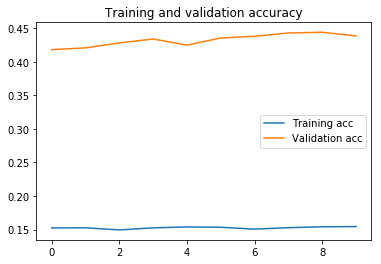

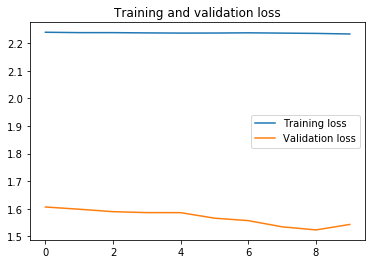

start 61
Epoch 1/10
97/97 [==============================] - 56s 582ms/step - loss: 2.2321 - acc: 0.1551 - val_loss: 1.4822 - val_acc: 0.4616
Epoch 2/10
97/97 [==============================] - 56s 576ms/step - loss: 2.2302 - acc: 0.1534 - val_loss: 1.4776 - val_acc: 0.4668
Epoch 3/10
97/97 [==============================] - 56s 575ms/step - loss: 2.2311 - acc: 0.1569 - val_loss: 1.4790 - val_acc: 0.4674
Epoch 4/10
97/97 [==============================] - 56s 577ms/step - loss: 2.2322 - acc: 0.1544 - val_loss: 1.4896 - val_acc: 0.4564
Epoch 5/10
97/97 [==============================] - 56s 577ms/step - loss: 2.2279 - acc: 0.1560 - val_loss: 1.4595 - val_acc: 0.4684
Epoch 6/10
97/97 [==============================] - 56s 573ms/step - loss: 2.2316 - acc: 0.1570 - val_loss: 1.4895 - val_acc: 0.4660
Epoch 7/10
97/97 [==============================] - 56s 576ms/step - loss: 2.2301 - acc: 0.1549 - val_loss: 1.4266 - val_acc: 0.4869
Epoch 8/10
97/97 [==============================] - 56s 577m

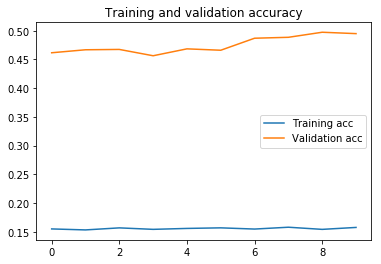

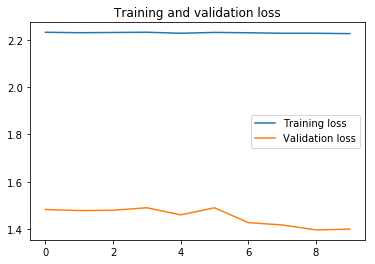

start 71
Epoch 1/10
97/97 [==============================] - 56s 582ms/step - loss: 2.2248 - acc: 0.1593 - val_loss: 1.3667 - val_acc: 0.5126
Epoch 2/10
97/97 [==============================] - 55s 572ms/step - loss: 2.2267 - acc: 0.1582 - val_loss: 1.3629 - val_acc: 0.5138
Epoch 3/10
97/97 [==============================] - 56s 576ms/step - loss: 2.2210 - acc: 0.1581 - val_loss: 1.3510 - val_acc: 0.5144
Epoch 4/10
97/97 [==============================] - 56s 578ms/step - loss: 2.2230 - acc: 0.1591 - val_loss: 1.3476 - val_acc: 0.5147
Epoch 5/10
97/97 [==============================] - 56s 575ms/step - loss: 2.2219 - acc: 0.1593 - val_loss: 1.3302 - val_acc: 0.5235
Epoch 6/10
97/97 [==============================] - 56s 575ms/step - loss: 2.2207 - acc: 0.1582 - val_loss: 1.3401 - val_acc: 0.5237
Epoch 7/10
97/97 [==============================] - 56s 577ms/step - loss: 2.2232 - acc: 0.1577 - val_loss: 1.3302 - val_acc: 0.5259
Epoch 8/10
97/97 [==============================] - 56s 575m

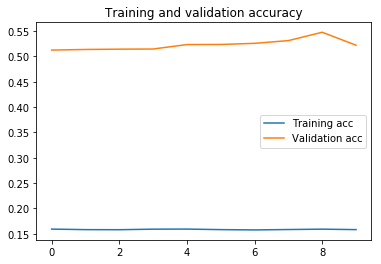

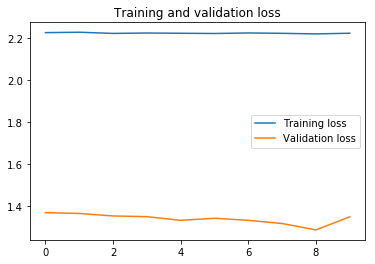

start 81
Epoch 1/10
97/97 [==============================] - 56s 580ms/step - loss: 2.2190 - acc: 0.1616 - val_loss: 1.2997 - val_acc: 0.5424
Epoch 2/10
97/97 [==============================] - 56s 577ms/step - loss: 2.2186 - acc: 0.1604 - val_loss: 1.2809 - val_acc: 0.5451
Epoch 3/10
97/97 [==============================] - 56s 577ms/step - loss: 2.2208 - acc: 0.1597 - val_loss: 1.2916 - val_acc: 0.5401
Epoch 4/10
97/97 [==============================] - 56s 574ms/step - loss: 2.2214 - acc: 0.1571 - val_loss: 1.2998 - val_acc: 0.5374
Epoch 5/10
97/97 [==============================] - 56s 576ms/step - loss: 2.2140 - acc: 0.1612 - val_loss: 1.2656 - val_acc: 0.5477
Epoch 6/10
97/97 [==============================] - 56s 576ms/step - loss: 2.2176 - acc: 0.1609 - val_loss: 1.2916 - val_acc: 0.5438
Epoch 7/10
97/97 [==============================] - 56s 574ms/step - loss: 2.2186 - acc: 0.1599 - val_loss: 1.2850 - val_acc: 0.5452
Epoch 8/10
97/97 [==============================] - 56s 578m

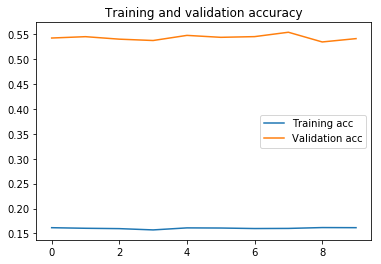

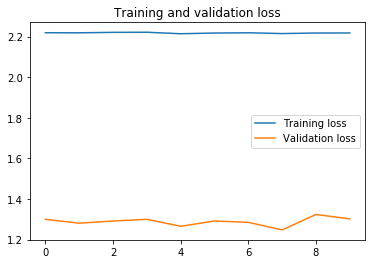

start 91
Epoch 1/10
97/97 [==============================] - 57s 584ms/step - loss: 2.2130 - acc: 0.1625 - val_loss: 1.2429 - val_acc: 0.5556
Epoch 2/10
97/97 [==============================] - 56s 576ms/step - loss: 2.2139 - acc: 0.1605 - val_loss: 1.2515 - val_acc: 0.5533
Epoch 3/10
97/97 [==============================] - 56s 572ms/step - loss: 2.2148 - acc: 0.1624 - val_loss: 1.2404 - val_acc: 0.5555
Epoch 4/10
97/97 [==============================] - 56s 578ms/step - loss: 2.2128 - acc: 0.1650 - val_loss: 1.2290 - val_acc: 0.5627
Epoch 5/10
97/97 [==============================] - 56s 577ms/step - loss: 2.2136 - acc: 0.1631 - val_loss: 1.2096 - val_acc: 0.5708
Epoch 6/10
97/97 [==============================] - 56s 574ms/step - loss: 2.2142 - acc: 0.1612 - val_loss: 1.2220 - val_acc: 0.5689
Epoch 7/10
97/97 [==============================] - 56s 578ms/step - loss: 2.2120 - acc: 0.1633 - val_loss: 1.2024 - val_acc: 0.5773
Epoch 8/10
97/97 [==============================] - 56s 576m

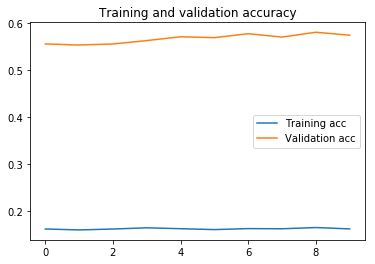

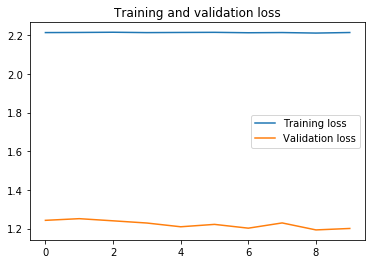

In [0]:
train_cycle = 5
epoch_num = 10

for i in range(train_cycle):
  print(f'start {51+i*10}')
  fname = 'model-resnet50-final-AR'+str(51+i*10)+'.h5'
  WEIGHTS_FINAL = root+'ColabOK/'+fname
  history_AR= net_final.fit_generator(train_datagen.flow(x_train, y_train, batch_size=512),
                    steps_per_epoch=int(len(x_train)//512),
                    validation_data=(x_test, y_test),
                    epochs=epoch_num, verbose=1)
  net_final.save(WEIGHTS_FINAL)
  call_history(history_AR)

start 101
Epoch 1/10
97/97 [==============================] - 57s 586ms/step - loss: 2.2124 - acc: 0.1644 - val_loss: 1.1789 - val_acc: 0.5809
Epoch 2/10
97/97 [==============================] - 56s 576ms/step - loss: 2.2105 - acc: 0.1634 - val_loss: 1.1783 - val_acc: 0.5860
Epoch 3/10
97/97 [==============================] - 56s 576ms/step - loss: 2.2114 - acc: 0.1631 - val_loss: 1.2116 - val_acc: 0.5761
Epoch 4/10
97/97 [==============================] - 56s 577ms/step - loss: 2.2093 - acc: 0.1653 - val_loss: 1.1826 - val_acc: 0.5849
Epoch 5/10
97/97 [==============================] - 56s 577ms/step - loss: 2.2103 - acc: 0.1642 - val_loss: 1.1763 - val_acc: 0.5873
Epoch 6/10
97/97 [==============================] - 56s 575ms/step - loss: 2.2125 - acc: 0.1650 - val_loss: 1.1856 - val_acc: 0.5810
Epoch 7/10
97/97 [==============================] - 56s 576ms/step - loss: 2.2133 - acc: 0.1619 - val_loss: 1.1659 - val_acc: 0.5877
Epoch 8/10
97/97 [==============================] - 56s 576

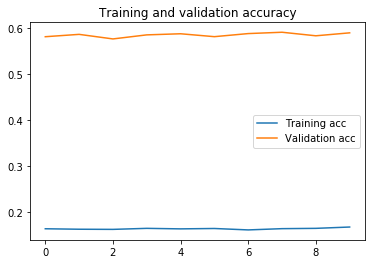

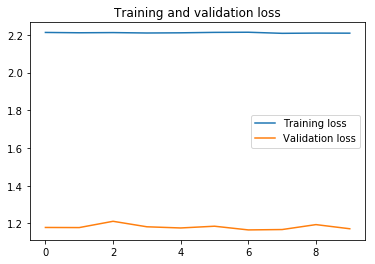

start 111
Epoch 1/10
97/97 [==============================] - 57s 583ms/step - loss: 2.2072 - acc: 0.1638 - val_loss: 1.1905 - val_acc: 0.5867
Epoch 2/10
97/97 [==============================] - 56s 576ms/step - loss: 2.2087 - acc: 0.1653 - val_loss: 1.1146 - val_acc: 0.6085
Epoch 3/10
97/97 [==============================] - 56s 577ms/step - loss: 2.2090 - acc: 0.1648 - val_loss: 1.1343 - val_acc: 0.6018
Epoch 4/10
97/97 [==============================] - 56s 575ms/step - loss: 2.2094 - acc: 0.1674 - val_loss: 1.1388 - val_acc: 0.5974
Epoch 5/10
97/97 [==============================] - 56s 577ms/step - loss: 2.2087 - acc: 0.1664 - val_loss: 1.1244 - val_acc: 0.6051
Epoch 6/10
97/97 [==============================] - 56s 577ms/step - loss: 2.2066 - acc: 0.1680 - val_loss: 1.1254 - val_acc: 0.6062
Epoch 7/10
97/97 [==============================] - 56s 576ms/step - loss: 2.2060 - acc: 0.1666 - val_loss: 1.1400 - val_acc: 0.5982
Epoch 8/10
97/97 [==============================] - 56s 578

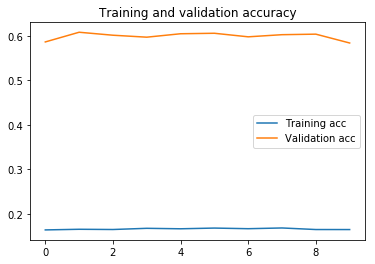

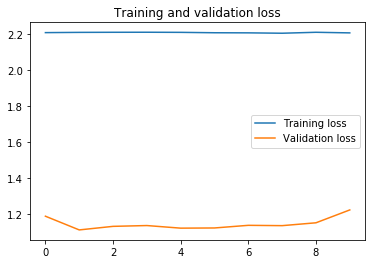

start 121
Epoch 1/10
97/97 [==============================] - 57s 586ms/step - loss: 2.2060 - acc: 0.1663 - val_loss: 1.1051 - val_acc: 0.6135
Epoch 2/10
97/97 [==============================] - 56s 577ms/step - loss: 2.2046 - acc: 0.1680 - val_loss: 1.1561 - val_acc: 0.6096
Epoch 3/10
97/97 [==============================] - 56s 576ms/step - loss: 2.2058 - acc: 0.1647 - val_loss: 1.1265 - val_acc: 0.6032
Epoch 4/10
97/97 [==============================] - 56s 575ms/step - loss: 2.2049 - acc: 0.1682 - val_loss: 1.0901 - val_acc: 0.6194
Epoch 5/10
97/97 [==============================] - 56s 578ms/step - loss: 2.2036 - acc: 0.1686 - val_loss: 1.1154 - val_acc: 0.6133
Epoch 6/10
97/97 [==============================] - 56s 573ms/step - loss: 2.2044 - acc: 0.1654 - val_loss: 1.0874 - val_acc: 0.6271
Epoch 7/10
97/97 [==============================] - 56s 577ms/step - loss: 2.2020 - acc: 0.1651 - val_loss: 1.1392 - val_acc: 0.6026
Epoch 8/10
97/97 [==============================] - 56s 579

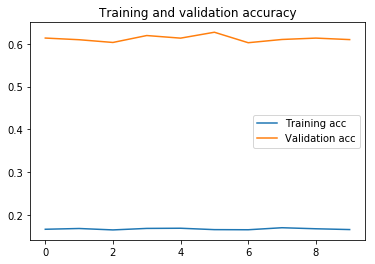

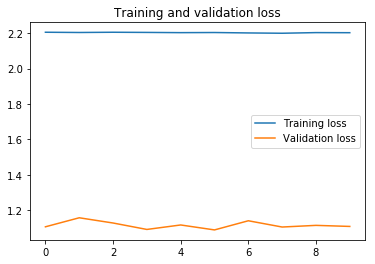

start 131
Epoch 1/10
97/97 [==============================] - 56s 581ms/step - loss: 2.2065 - acc: 0.1683 - val_loss: 1.1049 - val_acc: 0.6147
Epoch 2/10
97/97 [==============================] - 56s 575ms/step - loss: 2.2002 - acc: 0.1673 - val_loss: 1.0927 - val_acc: 0.6248
Epoch 3/10
97/97 [==============================] - 56s 578ms/step - loss: 2.2010 - acc: 0.1701 - val_loss: 1.0855 - val_acc: 0.6246
Epoch 4/10
97/97 [==============================] - 56s 575ms/step - loss: 2.2020 - acc: 0.1677 - val_loss: 1.0514 - val_acc: 0.6376
Epoch 5/10
97/97 [==============================] - 56s 576ms/step - loss: 2.2010 - acc: 0.1685 - val_loss: 1.0705 - val_acc: 0.6323
Epoch 6/10
97/97 [==============================] - 56s 577ms/step - loss: 2.2006 - acc: 0.1696 - val_loss: 1.0861 - val_acc: 0.6260
Epoch 7/10
97/97 [==============================] - 56s 576ms/step - loss: 2.1985 - acc: 0.1705 - val_loss: 1.0568 - val_acc: 0.6359
Epoch 8/10
97/97 [==============================] - 56s 574

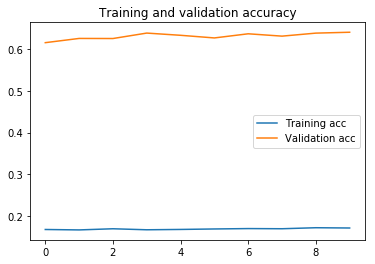

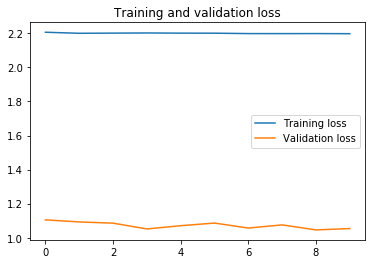

start 141
Epoch 1/10
97/97 [==============================] - 57s 583ms/step - loss: 2.1965 - acc: 0.1724 - val_loss: 1.0721 - val_acc: 0.6268
Epoch 2/10
97/97 [==============================] - 56s 575ms/step - loss: 2.1999 - acc: 0.1693 - val_loss: 1.0874 - val_acc: 0.6250
Epoch 3/10
97/97 [==============================] - 56s 577ms/step - loss: 2.1984 - acc: 0.1688 - val_loss: 1.0437 - val_acc: 0.6409
Epoch 4/10
97/97 [==============================] - 56s 575ms/step - loss: 2.1999 - acc: 0.1686 - val_loss: 1.0622 - val_acc: 0.6359
Epoch 5/10
97/97 [==============================] - 56s 575ms/step - loss: 2.1977 - acc: 0.1687 - val_loss: 1.0660 - val_acc: 0.6349
Epoch 6/10
97/97 [==============================] - 56s 576ms/step - loss: 2.2014 - acc: 0.1670 - val_loss: 1.0124 - val_acc: 0.6511
Epoch 7/10
97/97 [==============================] - 56s 574ms/step - loss: 2.1958 - acc: 0.1694 - val_loss: 1.0363 - val_acc: 0.6437
Epoch 8/10
97/97 [==============================] - 56s 576

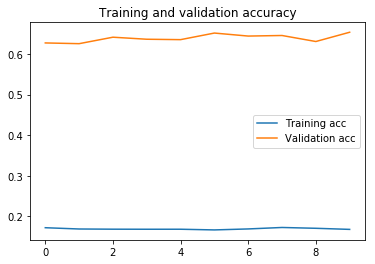

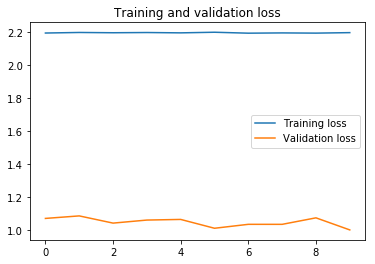

start 151
Epoch 1/10
97/97 [==============================] - 57s 584ms/step - loss: 2.1967 - acc: 0.1701 - val_loss: 1.0574 - val_acc: 0.6379
Epoch 2/10
97/97 [==============================] - 56s 575ms/step - loss: 2.1995 - acc: 0.1694 - val_loss: 1.0600 - val_acc: 0.6354
Epoch 3/10
97/97 [==============================] - 56s 576ms/step - loss: 2.1956 - acc: 0.1683 - val_loss: 1.0248 - val_acc: 0.6448
Epoch 4/10
97/97 [==============================] - 56s 577ms/step - loss: 2.1965 - acc: 0.1698 - val_loss: 1.0345 - val_acc: 0.6436
Epoch 5/10
97/97 [==============================] - 56s 573ms/step - loss: 2.1977 - acc: 0.1698 - val_loss: 1.0271 - val_acc: 0.6456
Epoch 6/10
97/97 [==============================] - 56s 574ms/step - loss: 2.1978 - acc: 0.1679 - val_loss: 1.0544 - val_acc: 0.6374
Epoch 7/10
97/97 [==============================] - 56s 577ms/step - loss: 2.1949 - acc: 0.1713 - val_loss: 0.9980 - val_acc: 0.6564
Epoch 8/10
97/97 [==============================] - 56s 574

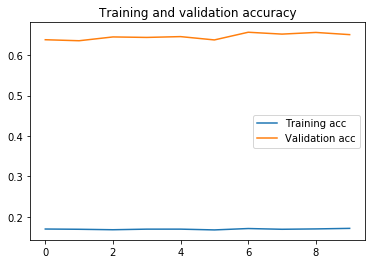

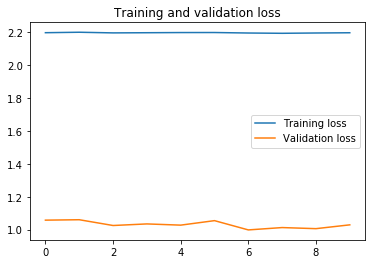

start 161
Epoch 1/10
97/97 [==============================] - 56s 582ms/step - loss: 2.1950 - acc: 0.1721 - val_loss: 1.0277 - val_acc: 0.6477
Epoch 2/10
97/97 [==============================] - 56s 573ms/step - loss: 2.1942 - acc: 0.1727 - val_loss: 1.0182 - val_acc: 0.6512
Epoch 3/10
97/97 [==============================] - 56s 576ms/step - loss: 2.1906 - acc: 0.1737 - val_loss: 1.0165 - val_acc: 0.6513
Epoch 4/10
97/97 [==============================] - 56s 576ms/step - loss: 2.1941 - acc: 0.1703 - val_loss: 0.9855 - val_acc: 0.6604
Epoch 5/10
97/97 [==============================] - 56s 576ms/step - loss: 2.1963 - acc: 0.1690 - val_loss: 0.9773 - val_acc: 0.6641
Epoch 6/10
97/97 [==============================] - 56s 575ms/step - loss: 2.1918 - acc: 0.1733 - val_loss: 1.0021 - val_acc: 0.6522
Epoch 7/10
97/97 [==============================] - 56s 577ms/step - loss: 2.1949 - acc: 0.1690 - val_loss: 0.9871 - val_acc: 0.6568
Epoch 8/10
97/97 [==============================] - 56s 574

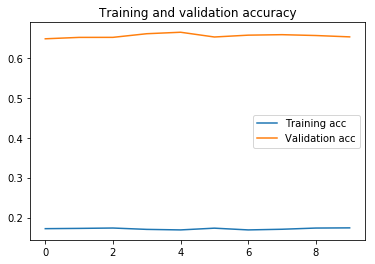

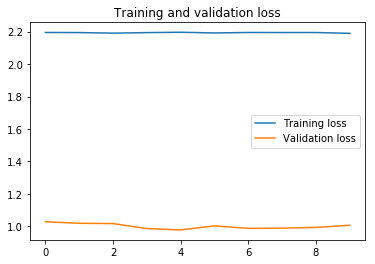

start 171
Epoch 1/10
97/97 [==============================] - 56s 578ms/step - loss: 2.1967 - acc: 0.1696 - val_loss: 1.0008 - val_acc: 0.6581
Epoch 2/10
97/97 [==============================] - 55s 569ms/step - loss: 2.1939 - acc: 0.1734 - val_loss: 1.0232 - val_acc: 0.6516
Epoch 3/10
97/97 [==============================] - 55s 568ms/step - loss: 2.1928 - acc: 0.1717 - val_loss: 1.0184 - val_acc: 0.6524
Epoch 4/10
97/97 [==============================] - 55s 566ms/step - loss: 2.1932 - acc: 0.1698 - val_loss: 0.9548 - val_acc: 0.6693
Epoch 5/10
97/97 [==============================] - 55s 567ms/step - loss: 2.1949 - acc: 0.1703 - val_loss: 0.9763 - val_acc: 0.6621
Epoch 6/10
97/97 [==============================] - 56s 574ms/step - loss: 2.1943 - acc: 0.1706 - val_loss: 0.9853 - val_acc: 0.6615
Epoch 7/10
97/97 [==============================] - 56s 580ms/step - loss: 2.1916 - acc: 0.1756 - val_loss: 0.9867 - val_acc: 0.6650
Epoch 8/10
97/97 [==============================] - 55s 570

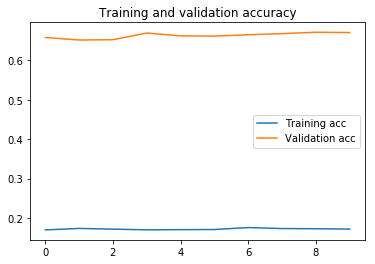

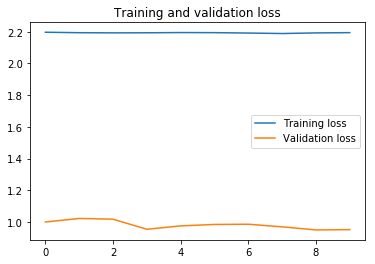

start 181
Epoch 1/10
97/97 [==============================] - 57s 586ms/step - loss: 2.1951 - acc: 0.1717 - val_loss: 1.0283 - val_acc: 0.6459
Epoch 2/10
97/97 [==============================] - 56s 576ms/step - loss: 2.1911 - acc: 0.1723 - val_loss: 0.9745 - val_acc: 0.6638
Epoch 3/10
97/97 [==============================] - 56s 574ms/step - loss: 2.1880 - acc: 0.1733 - val_loss: 0.9509 - val_acc: 0.6726
Epoch 4/10
97/97 [==============================] - 55s 568ms/step - loss: 2.1915 - acc: 0.1725 - val_loss: 0.9721 - val_acc: 0.6677
Epoch 5/10
97/97 [==============================] - 56s 573ms/step - loss: 2.1916 - acc: 0.1713 - val_loss: 0.9421 - val_acc: 0.6784
Epoch 6/10
97/97 [==============================] - 55s 571ms/step - loss: 2.1915 - acc: 0.1715 - val_loss: 0.9910 - val_acc: 0.6650
Epoch 7/10
97/97 [==============================] - 56s 576ms/step - loss: 2.1904 - acc: 0.1705 - val_loss: 0.9482 - val_acc: 0.6720
Epoch 8/10
97/97 [==============================] - 56s 573

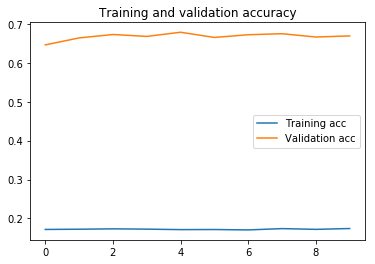

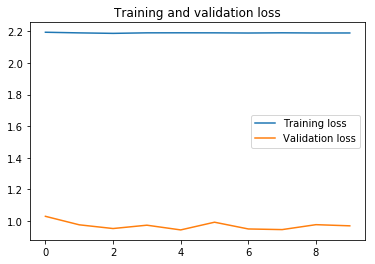

start 191
Epoch 1/10
97/97 [==============================] - 56s 582ms/step - loss: 2.1927 - acc: 0.1738 - val_loss: 0.9287 - val_acc: 0.6767
Epoch 2/10
97/97 [==============================] - 56s 576ms/step - loss: 2.1910 - acc: 0.1737 - val_loss: 0.9784 - val_acc: 0.6657
Epoch 3/10
97/97 [==============================] - 56s 574ms/step - loss: 2.1904 - acc: 0.1741 - val_loss: 0.9536 - val_acc: 0.6725
Epoch 4/10
97/97 [==============================] - 56s 578ms/step - loss: 2.1906 - acc: 0.1740 - val_loss: 0.9298 - val_acc: 0.6798
Epoch 5/10
97/97 [==============================] - 56s 574ms/step - loss: 2.1884 - acc: 0.1704 - val_loss: 0.9684 - val_acc: 0.6722
Epoch 6/10
97/97 [==============================] - 55s 570ms/step - loss: 2.1901 - acc: 0.1758 - val_loss: 0.9687 - val_acc: 0.6744
Epoch 7/10
97/97 [==============================] - 55s 568ms/step - loss: 2.1845 - acc: 0.1775 - val_loss: 0.9525 - val_acc: 0.6786
Epoch 8/10
97/97 [==============================] - 55s 570

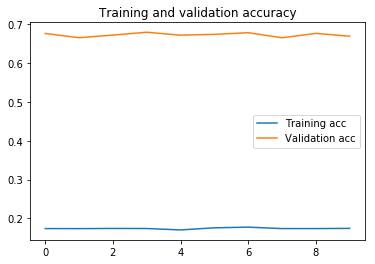

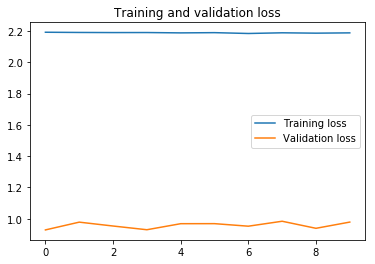

In [0]:
train_cycle = 10
epoch_num = 10

for i in range(train_cycle):
  print(f'start {101+i*10}')
  fname = 'model-resnet50-final-AR'+str(101+i*10)+'.h5'
  WEIGHTS_FINAL = root+'ColabOK/'+fname
  history_AR= net_final.fit_generator(train_datagen.flow(x_train, y_train, batch_size=512),
                    steps_per_epoch=int(len(x_train)//512),
                    validation_data=(x_test, y_test),
                    epochs=epoch_num, verbose=1)
  net_final.save(WEIGHTS_FINAL)
  call_history(history_AR)

# It seemed we went Augmentation too far, let's be gentler and move out dropout.

In [0]:
net = ResNet50(include_top=False, weights='imagenet', input_tensor=None,
               input_shape=(IMAGE_SIZE[0],IMAGE_SIZE[1],3))
x = net.output
x = Flatten()(x)
x = Dense(256,activation='relu')(x)

# 增加 DropOut layer
#x = Dropout(0.5)(x)

# 增加 Dense layer，以 softmax 產生個類別的機率值
output_layer = Dense(NUM_CLASSES, activation='softmax', name='softmax')(x)

# 設定凍結與要進行訓練的網路層
net_final = Model(inputs=net.input, outputs=output_layer)
for layer in net_final.layers[:FREEZE_LAYERS]:
    layer.trainable = False
for layer in net_final.layers[FREEZE_LAYERS:]:
    layer.trainable = True

# 使用 Adam optimizer，以較低的 learning rate 進行 fine-tuning
net_final.compile(optimizer=Adam(lr=1e-5),
                  loss='categorical_crossentropy', metrics=['accuracy'])

# 輸出整個網路結構
#print(net_final.summary())



train_datagen1 = ImageDataGenerator(rotation_range=10,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   channel_shift_range=5,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_datagen2 = ImageDataGenerator(rotation_range=20,
                                   width_shift_range=0.15,
                                   height_shift_range=0.15,
                                   shear_range=0.15,
                                   zoom_range=0.15,
                                   channel_shift_range=5,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
train_datagen3 = ImageDataGenerator(rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   channel_shift_range=10,
                                   horizontal_flip=True,
                                   fill_mode='nearest')


train_datagen1.fit(x_train)
train_datagen2.fit(x_train)
train_datagen3.fit(x_train)



 
  
train_cycle = 20
epoch_num = 10
#h5 = root+'ColabOK/'+'model-resnet50-final-AR2131.h5'

#net_final.load_weights(h5)

for i in range(train_cycle):
  print(f'start {1+(14+i)*10}')
  fname = 'model-resnet50-final-AR2'+str(1+(14+i)*10)+'.h5'
  WEIGHTS_FINAL = root+'ColabOK/'+fname
  if i <= 8:
    history_AR2= net_final.fit_generator(train_datagen1.flow(x_train, y_train, batch_size=512),
                    steps_per_epoch=int(len(x_train)//512),
                    validation_data=(x_test, y_test),
                    epochs=epoch_num, verbose=1)
  elif i <= 14:
    history_AR2= net_final.fit_generator(train_datagen2.flow(x_train, y_train, batch_size=512),
                    steps_per_epoch=int(len(x_train)//512),
                    validation_data=(x_test, y_test),
                    epochs=epoch_num, verbose=1)
  elif i >14:
    history_AR2= net_final.fit_generator(train_datagen3.flow(x_train, y_train, batch_size=512),
                    steps_per_epoch=int(len(x_train)//512),
                    validation_data=(x_test, y_test),
                    epochs=epoch_num, verbose=1)
    
  net_final.save(WEIGHTS_FINAL)
  call_history(history_AR2)
  


/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


start 331
Epoch 1/10
48/48 [==============================] - 93s 2s/step - loss: 2.0119 - acc: 0.2424 - val_loss: 0.5361 - val_acc: 0.8222
Epoch 2/10
48/48 [==============================] - 50s 1s/step - loss: 2.0067 - acc: 0.2431 - val_loss: 0.5444 - val_acc: 0.8189
Epoch 3/10
48/48 [==============================] - 50s 1s/step - loss: 2.0105 - acc: 0.2421 - val_loss: 0.5260 - val_acc: 0.8266
Epoch 4/10
48/48 [==============================] - 50s 1s/step - loss: 2.0058 - acc: 0.2467 - val_loss: 0.5370 - val_acc: 0.8206
Epoch 5/10
48/48 [==============================] - 50s 1s/step - loss: 2.0052 - acc: 0.2448 - val_loss: 0.5263 - val_acc: 0.8246
Epoch 6/10
48/48 [==============================] - 49s 1s/step - loss: 2.0100 - acc: 0.2452 - val_loss: 0.5526 - val_acc: 0.8153
Epoch 7/10
48/48 [==============================] - 49s 1s/step - loss: 2.0072 - acc: 0.2443 - val_loss: 0.5262 - val_acc: 0.8246
Epoch 8/10
48/48 [==============================] - 49s 1s/step - loss: 2.0151 -

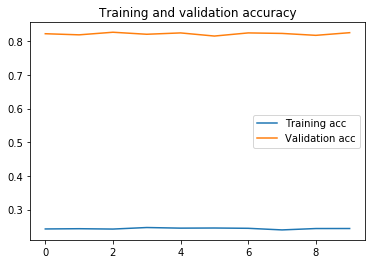

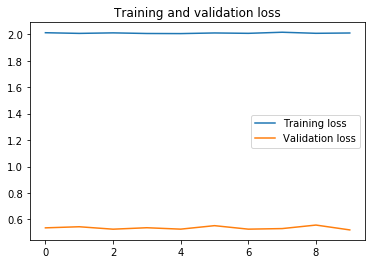

start 341
Epoch 1/10
48/48 [==============================] - 51s 1s/step - loss: 2.0057 - acc: 0.2446 - val_loss: 0.5305 - val_acc: 0.8235
Epoch 2/10
48/48 [==============================] - 50s 1s/step - loss: 2.0090 - acc: 0.2435 - val_loss: 0.5299 - val_acc: 0.8218
Epoch 3/10
48/48 [==============================] - 50s 1s/step - loss: 2.0029 - acc: 0.2469 - val_loss: 0.5344 - val_acc: 0.8236
Epoch 4/10
48/48 [==============================] - 49s 1s/step - loss: 2.0126 - acc: 0.2433 - val_loss: 0.5361 - val_acc: 0.8226
Epoch 5/10
48/48 [==============================] - 50s 1s/step - loss: 2.0065 - acc: 0.2435 - val_loss: 0.5423 - val_acc: 0.8242
Epoch 6/10
48/48 [==============================] - 50s 1s/step - loss: 2.0061 - acc: 0.2447 - val_loss: 0.5311 - val_acc: 0.8263
Epoch 7/10
48/48 [==============================] - 50s 1s/step - loss: 2.0054 - acc: 0.2456 - val_loss: 0.5488 - val_acc: 0.8209
Epoch 8/10
48/48 [==============================] - 49s 1s/step - loss: 2.0075 -

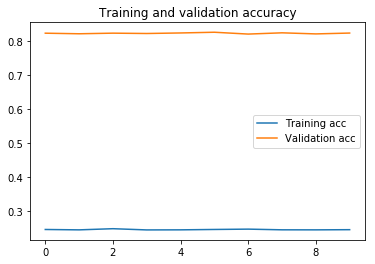

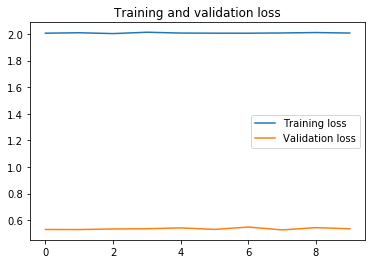

start 351
Epoch 1/10
48/48 [==============================] - 51s 1s/step - loss: 2.0093 - acc: 0.2440 - val_loss: 0.5475 - val_acc: 0.8207
Epoch 2/10
48/48 [==============================] - 50s 1s/step - loss: 2.0042 - acc: 0.2411 - val_loss: 0.5365 - val_acc: 0.8240
Epoch 3/10
48/48 [==============================] - 50s 1s/step - loss: 2.0105 - acc: 0.2405 - val_loss: 0.5262 - val_acc: 0.8303
Epoch 4/10
48/48 [==============================] - 50s 1s/step - loss: 2.0016 - acc: 0.2449 - val_loss: 0.5297 - val_acc: 0.8235
Epoch 5/10
48/48 [==============================] - 49s 1s/step - loss: 2.0077 - acc: 0.2436 - val_loss: 0.5478 - val_acc: 0.8187
Epoch 6/10
48/48 [==============================] - 49s 1s/step - loss: 2.0019 - acc: 0.2445 - val_loss: 0.5204 - val_acc: 0.8262
Epoch 7/10
48/48 [==============================] - 49s 1s/step - loss: 2.0084 - acc: 0.2409 - val_loss: 0.5433 - val_acc: 0.8198
Epoch 8/10
48/48 [==============================] - 49s 1s/step - loss: 2.0031 -

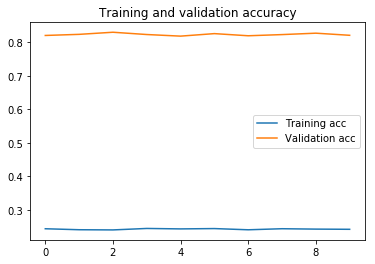

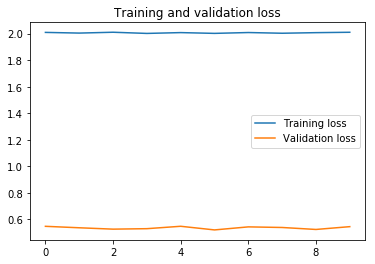

start 361
Epoch 1/10
48/48 [==============================] - 51s 1s/step - loss: 2.0055 - acc: 0.2422 - val_loss: 0.5312 - val_acc: 0.8285
Epoch 2/10


KeyboardInterrupt: ignored

E0815 05:21:59.521921 140548791412608 zmqstream.py:435] Uncaught exception in ZMQStream callback
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelbase.py", line 421, in execute_request
    self._abort_queues()
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelbase.py", line 637, in _abort_queues
    self._abort_queue(stream)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelbase.py",

In [0]:
net = ResNet50(include_top=False, weights='imagenet', input_tensor=None,
               input_shape=(IMAGE_SIZE[0],IMAGE_SIZE[1],3))
x = net.output
x = Flatten()(x)
x = Dense(256,activation='relu')(x)

# 增加 DropOut layer
#x = Dropout(0.5)(x)

# 增加 Dense layer，以 softmax 產生個類別的機率值
output_layer = Dense(NUM_CLASSES, activation='softmax', name='softmax')(x)

# 設定凍結與要進行訓練的網路層
net_final = Model(inputs=net.input, outputs=output_layer)
for layer in net_final.layers[:FREEZE_LAYERS]:
    layer.trainable = False
for layer in net_final.layers[FREEZE_LAYERS:]:
    layer.trainable = True

# 使用 Adam optimizer，以較低的 learning rate 進行 fine-tuning
net_final.compile(optimizer=Adam(lr=1e-5),
                  loss='categorical_crossentropy', metrics=['accuracy'])

# 輸出整個網路結構
#print(net_final.summary())



train_datagen1 = ImageDataGenerator(rotation_range=10,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   channel_shift_range=5,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_datagen2 = ImageDataGenerator(rotation_range=20,
                                   width_shift_range=0.15,
                                   height_shift_range=0.15,
                                   shear_range=0.15,
                                   zoom_range=0.15,
                                   channel_shift_range=5,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_datagen3 = ImageDataGenerator(rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   channel_shift_range=10,
                                   horizontal_flip=True,
                                   fill_mode='nearest')


train_datagen1.fit(x_train)
train_datagen2.fit(x_train)
train_datagen3.fit(x_train)



 
  
train_cycle = 20
epoch_num = 10
h5 = root+'ColabOK/'+'model-resnet50-final-AR3321.h5'

net_final.load_weights(h5)

for i in range(train_cycle):
  print(f'start {1+(33+i)*10}')
  fname = 'model-resnet50-final-AR3'+str(1+(33+i)*10)+'.h5'
  WEIGHTS_FINAL = root+'ColabOK/'+fname
  history_AR3= net_final.fit_generator(train_datagen1.flow(x_train, y_train, batch_size=1024),
                    steps_per_epoch=int(len(x_train)//1024),
                    validation_data=(x_test, y_test),
                    epochs=epoch_num, verbose=1)
    
  net_final.save(WEIGHTS_FINAL)
  call_history(history_AR3)
  


In [0]:

# 影像大小
IMAGE_SIZE = (32, 32)

# 影像類別數
NUM_CLASSES = 10

# 若 GPU 記憶體不足，可調降 batch size 或凍結更多層網路
BATCH_SIZE = 8

# 凍結網路層數
FREEZE_LAYERS = 2

# Epoch 數
NUM_EPOCHS = 10

# 模型輸出儲存的檔案
WEIGHTS_FINAL = root+'ColabOK/model-resnet50-final.h5'






net = ResNet50(include_top=False, weights='imagenet', input_tensor=None,
               input_shape=(IMAGE_SIZE[0],IMAGE_SIZE[1],3))
x = net.output
x = Flatten()(x)
x = Dense(256,activation='relu')(x)

# 增加 DropOut layer
#x = Dropout(0.5)(x)

# 增加 Dense layer，以 softmax 產生個類別的機率值
output_layer = Dense(NUM_CLASSES, activation='softmax', name='softmax')(x)

# 設定凍結與要進行訓練的網路層
net_final = Model(inputs=net.input, outputs=output_layer)
for layer in net_final.layers[:FREEZE_LAYERS]:
    layer.trainable = False
for layer in net_final.layers[FREEZE_LAYERS:]:
    layer.trainable = True

# 使用 Adam optimizer，以較低的 learning rate 進行 fine-tuning
net_final.compile(optimizer=Adam(lr=1e-5),
                  loss='categorical_crossentropy', metrics=['accuracy'])

# 輸出整個網路結構
#print(net_final.summary())



/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '
W0815 05:36:38.116272 139905996240768 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


start 361
Epoch 1/10
97/97 [==============================] - 105s 1s/step - loss: 2.0086 - acc: 0.2430 - val_loss: 0.5482 - val_acc: 0.8212
Epoch 2/10
97/97 [==============================] - 54s 561ms/step - loss: 2.0120 - acc: 0.2438 - val_loss: 0.5375 - val_acc: 0.8254
Epoch 3/10
97/97 [==============================] - 56s 577ms/step - loss: 2.0109 - acc: 0.2424 - val_loss: 0.5355 - val_acc: 0.8232
Epoch 4/10
97/97 [==============================] - 55s 563ms/step - loss: 2.0091 - acc: 0.2419 - val_loss: 0.5539 - val_acc: 0.8172
Epoch 5/10
97/97 [==============================] - 54s 559ms/step - loss: 2.0092 - acc: 0.2423 - val_loss: 0.5367 - val_acc: 0.8210
Epoch 6/10
97/97 [==============================] - 54s 560ms/step - loss: 2.0015 - acc: 0.2453 - val_loss: 0.5285 - val_acc: 0.8251
Epoch 7/10
97/97 [==============================] - 54s 560ms/step - loss: 2.0107 - acc: 0.2429 - val_loss: 0.5294 - val_acc: 0.8242
Epoch 8/10
97/97 [==============================] - 54s 557ms

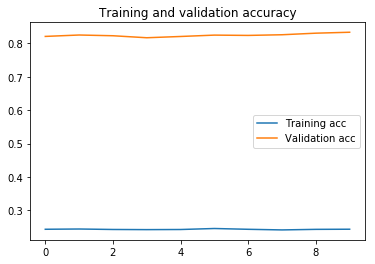

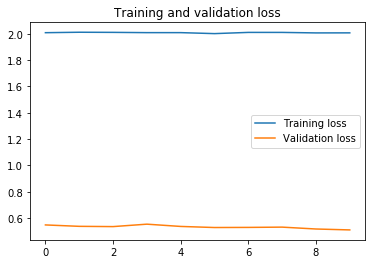

start 371
Epoch 1/10
97/97 [==============================] - 55s 571ms/step - loss: 2.0094 - acc: 0.2437 - val_loss: 0.5381 - val_acc: 0.8256
Epoch 2/10
97/97 [==============================] - 55s 562ms/step - loss: 2.0066 - acc: 0.2429 - val_loss: 0.5235 - val_acc: 0.8294
Epoch 3/10
97/97 [==============================] - 54s 562ms/step - loss: 2.0117 - acc: 0.2428 - val_loss: 0.5280 - val_acc: 0.8265
Epoch 4/10
97/97 [==============================] - 54s 561ms/step - loss: 2.0061 - acc: 0.2437 - val_loss: 0.5291 - val_acc: 0.8256
Epoch 5/10
97/97 [==============================] - 54s 560ms/step - loss: 2.0057 - acc: 0.2426 - val_loss: 0.5356 - val_acc: 0.8255
Epoch 6/10
97/97 [==============================] - 55s 563ms/step - loss: 2.0066 - acc: 0.2422 - val_loss: 0.5572 - val_acc: 0.8204
Epoch 7/10
97/97 [==============================] - 54s 559ms/step - loss: 2.0082 - acc: 0.2459 - val_loss: 0.5257 - val_acc: 0.8258
Epoch 8/10
97/97 [==============================] - 54s 558

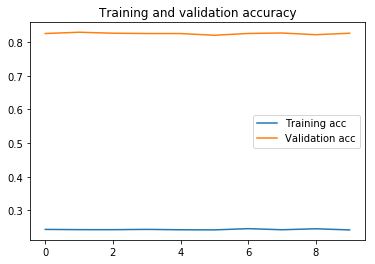

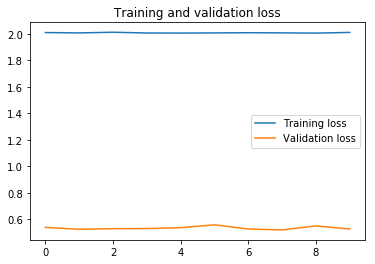

start 381
Epoch 1/10
97/97 [==============================] - 55s 568ms/step - loss: 2.0084 - acc: 0.2438 - val_loss: 0.5265 - val_acc: 0.8259
Epoch 2/10
97/97 [==============================] - 54s 557ms/step - loss: 2.0028 - acc: 0.2464 - val_loss: 0.5365 - val_acc: 0.8266
Epoch 3/10
97/97 [==============================] - 54s 558ms/step - loss: 2.0027 - acc: 0.2433 - val_loss: 0.5240 - val_acc: 0.8279
Epoch 4/10
97/97 [==============================] - 54s 558ms/step - loss: 2.0048 - acc: 0.2427 - val_loss: 0.5252 - val_acc: 0.8281
Epoch 5/10
97/97 [==============================] - 54s 559ms/step - loss: 2.0094 - acc: 0.2422 - val_loss: 0.5192 - val_acc: 0.8281
Epoch 6/10
97/97 [==============================] - 54s 562ms/step - loss: 2.0025 - acc: 0.2422 - val_loss: 0.5456 - val_acc: 0.8215
Epoch 7/10
97/97 [==============================] - 54s 559ms/step - loss: 2.0052 - acc: 0.2432 - val_loss: 0.5343 - val_acc: 0.8245
Epoch 8/10
97/97 [==============================] - 54s 560

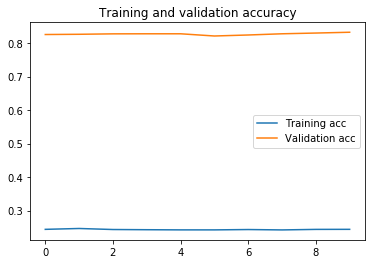

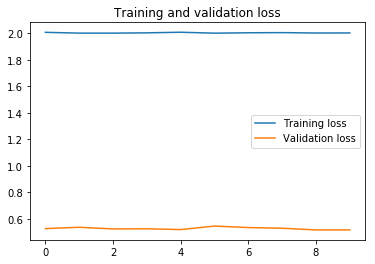

start 391
Epoch 1/10
97/97 [==============================] - 55s 571ms/step - loss: 2.0139 - acc: 0.2424 - val_loss: 0.5425 - val_acc: 0.8257
Epoch 2/10
97/97 [==============================] - 54s 561ms/step - loss: 2.0025 - acc: 0.2449 - val_loss: 0.5376 - val_acc: 0.8254
Epoch 3/10
97/97 [==============================] - 54s 558ms/step - loss: 2.0005 - acc: 0.2450 - val_loss: 0.5174 - val_acc: 0.8294
Epoch 4/10
97/97 [==============================] - 54s 560ms/step - loss: 2.0070 - acc: 0.2434 - val_loss: 0.5327 - val_acc: 0.8257
Epoch 5/10
97/97 [==============================] - 55s 567ms/step - loss: 2.0093 - acc: 0.2413 - val_loss: 0.5253 - val_acc: 0.8272
Epoch 6/10
97/97 [==============================] - 55s 567ms/step - loss: 2.0069 - acc: 0.2410 - val_loss: 0.5222 - val_acc: 0.8281
Epoch 7/10
97/97 [==============================] - 55s 565ms/step - loss: 2.0019 - acc: 0.2459 - val_loss: 0.5337 - val_acc: 0.8259
Epoch 8/10
97/97 [==============================] - 54s 558

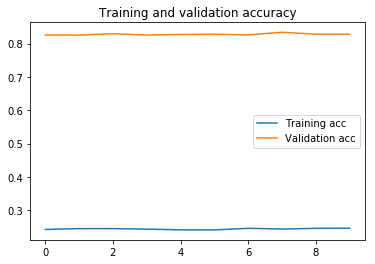

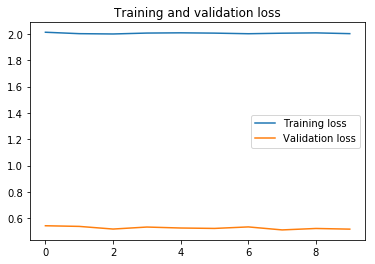

start 401
Epoch 1/10
97/97 [==============================] - 55s 571ms/step - loss: 2.0046 - acc: 0.2451 - val_loss: 0.5235 - val_acc: 0.8297
Epoch 2/10
97/97 [==============================] - 54s 562ms/step - loss: 2.0037 - acc: 0.2441 - val_loss: 0.5213 - val_acc: 0.8297
Epoch 3/10
97/97 [==============================] - 54s 556ms/step - loss: 2.0022 - acc: 0.2441 - val_loss: 0.5245 - val_acc: 0.8288
Epoch 4/10
97/97 [==============================] - 54s 558ms/step - loss: 2.0051 - acc: 0.2437 - val_loss: 0.5325 - val_acc: 0.8290
Epoch 5/10
97/97 [==============================] - 54s 557ms/step - loss: 2.0047 - acc: 0.2442 - val_loss: 0.5252 - val_acc: 0.8272
Epoch 6/10
97/97 [==============================] - 54s 557ms/step - loss: 2.0073 - acc: 0.2438 - val_loss: 0.5102 - val_acc: 0.8311
Epoch 7/10
97/97 [==============================] - 54s 557ms/step - loss: 2.0017 - acc: 0.2456 - val_loss: 0.5052 - val_acc: 0.8338
Epoch 8/10
97/97 [==============================] - 55s 563

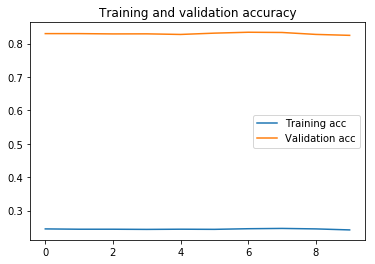

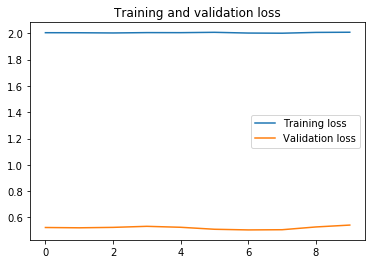

start 411
Epoch 1/10
97/97 [==============================] - 55s 570ms/step - loss: 2.0082 - acc: 0.2432 - val_loss: 0.5264 - val_acc: 0.8272
Epoch 2/10
97/97 [==============================] - 54s 560ms/step - loss: 2.0059 - acc: 0.2429 - val_loss: 0.5227 - val_acc: 0.8247
Epoch 3/10
97/97 [==============================] - 54s 558ms/step - loss: 2.0104 - acc: 0.2425 - val_loss: 0.5296 - val_acc: 0.8261
Epoch 4/10
97/97 [==============================] - 54s 555ms/step - loss: 2.0034 - acc: 0.2449 - val_loss: 0.5282 - val_acc: 0.8290
Epoch 5/10
97/97 [==============================] - 54s 560ms/step - loss: 2.0046 - acc: 0.2454 - val_loss: 0.5155 - val_acc: 0.8309
Epoch 6/10
97/97 [==============================] - 54s 560ms/step - loss: 2.0042 - acc: 0.2448 - val_loss: 0.5389 - val_acc: 0.8244
Epoch 7/10
97/97 [==============================] - 54s 560ms/step - loss: 2.0050 - acc: 0.2437 - val_loss: 0.5179 - val_acc: 0.8298
Epoch 8/10
97/97 [==============================] - 54s 562

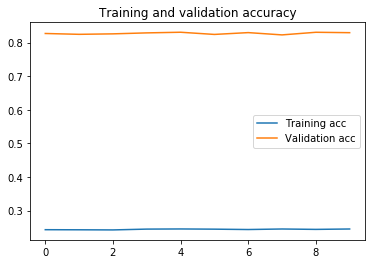

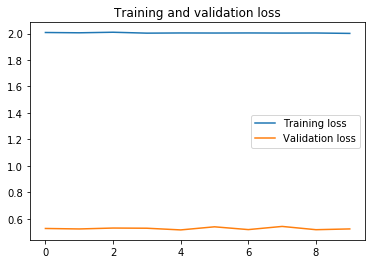

start 421
Epoch 1/10
97/97 [==============================] - 55s 568ms/step - loss: 2.0025 - acc: 0.2453 - val_loss: 0.5150 - val_acc: 0.8309
Epoch 2/10
97/97 [==============================] - 54s 558ms/step - loss: 2.0014 - acc: 0.2428 - val_loss: 0.5094 - val_acc: 0.8311
Epoch 3/10
97/97 [==============================] - 54s 559ms/step - loss: 2.0077 - acc: 0.2409 - val_loss: 0.5358 - val_acc: 0.8268
Epoch 4/10
97/97 [==============================] - 54s 559ms/step - loss: 1.9975 - acc: 0.2451 - val_loss: 0.5200 - val_acc: 0.8318
Epoch 5/10
97/97 [==============================] - 54s 561ms/step - loss: 2.0044 - acc: 0.2447 - val_loss: 0.5246 - val_acc: 0.8331
Epoch 6/10
97/97 [==============================] - 54s 559ms/step - loss: 2.0026 - acc: 0.2420 - val_loss: 0.5222 - val_acc: 0.8320
Epoch 7/10
97/97 [==============================] - 55s 571ms/step - loss: 1.9982 - acc: 0.2463 - val_loss: 0.5676 - val_acc: 0.8169
Epoch 8/10
97/97 [==============================] - 56s 575

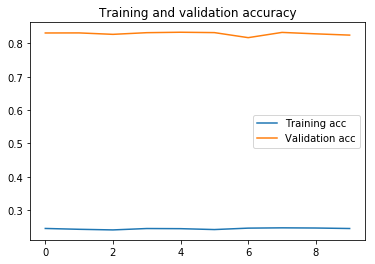

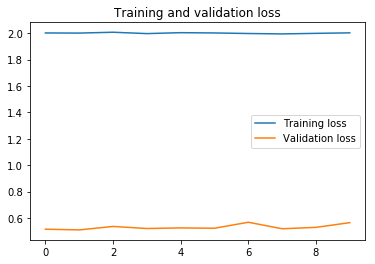

start 431
Epoch 1/10
97/97 [==============================] - 55s 568ms/step - loss: 2.0032 - acc: 0.2461 - val_loss: 0.5344 - val_acc: 0.8302
Epoch 2/10
97/97 [==============================] - 55s 563ms/step - loss: 1.9995 - acc: 0.2472 - val_loss: 0.5258 - val_acc: 0.8326
Epoch 3/10
97/97 [==============================] - 54s 559ms/step - loss: 2.0003 - acc: 0.2451 - val_loss: 0.5401 - val_acc: 0.8268
Epoch 4/10
97/97 [==============================] - 54s 558ms/step - loss: 2.0029 - acc: 0.2446 - val_loss: 0.5279 - val_acc: 0.8311
Epoch 5/10
97/97 [==============================] - 54s 559ms/step - loss: 2.0020 - acc: 0.2459 - val_loss: 0.5238 - val_acc: 0.8336
Epoch 6/10
97/97 [==============================] - 54s 558ms/step - loss: 2.0000 - acc: 0.2467 - val_loss: 0.5236 - val_acc: 0.8321
Epoch 7/10
97/97 [==============================] - 55s 566ms/step - loss: 2.0015 - acc: 0.2460 - val_loss: 0.5172 - val_acc: 0.8367
Epoch 8/10
97/97 [==============================] - 54s 562

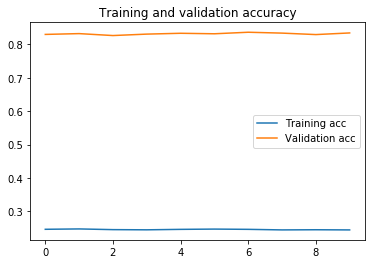

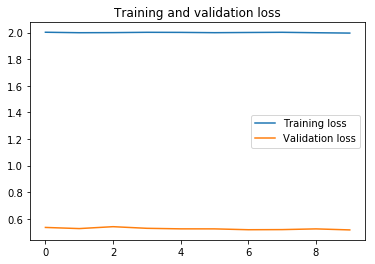

start 441
Epoch 1/10
97/97 [==============================] - 56s 574ms/step - loss: 1.9992 - acc: 0.2463 - val_loss: 0.5241 - val_acc: 0.8334
Epoch 2/10
97/97 [==============================] - 55s 563ms/step - loss: 2.0013 - acc: 0.2454 - val_loss: 0.5195 - val_acc: 0.8349
Epoch 3/10
97/97 [==============================] - 55s 565ms/step - loss: 2.0013 - acc: 0.2458 - val_loss: 0.5349 - val_acc: 0.8290
Epoch 4/10
97/97 [==============================] - 54s 555ms/step - loss: 1.9971 - acc: 0.2483 - val_loss: 0.5164 - val_acc: 0.8341
Epoch 5/10
97/97 [==============================] - 53s 549ms/step - loss: 2.0004 - acc: 0.2458 - val_loss: 0.5304 - val_acc: 0.8287
Epoch 6/10
97/97 [==============================] - 53s 549ms/step - loss: 2.0043 - acc: 0.2429 - val_loss: 0.4937 - val_acc: 0.8352
Epoch 7/10
97/97 [==============================] - 53s 551ms/step - loss: 2.0000 - acc: 0.2453 - val_loss: 0.5194 - val_acc: 0.8296
Epoch 8/10
97/97 [==============================] - 53s 549

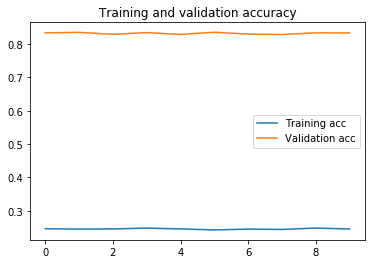

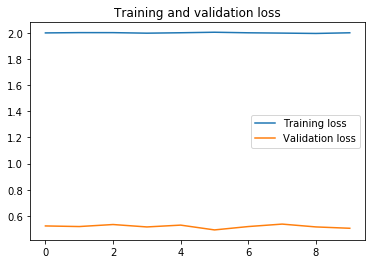

start 451
Epoch 1/10
97/97 [==============================] - 54s 554ms/step - loss: 1.9999 - acc: 0.2465 - val_loss: 0.5417 - val_acc: 0.8263
Epoch 2/10
97/97 [==============================] - 53s 550ms/step - loss: 1.9987 - acc: 0.2469 - val_loss: 0.5454 - val_acc: 0.8252
Epoch 3/10
97/97 [==============================] - 53s 549ms/step - loss: 2.0007 - acc: 0.2458 - val_loss: 0.5247 - val_acc: 0.8296
Epoch 4/10
97/97 [==============================] - 53s 548ms/step - loss: 1.9958 - acc: 0.2450 - val_loss: 0.5297 - val_acc: 0.8316
Epoch 5/10
97/97 [==============================] - 53s 550ms/step - loss: 1.9963 - acc: 0.2485 - val_loss: 0.5319 - val_acc: 0.8296
Epoch 6/10
97/97 [==============================] - 53s 547ms/step - loss: 1.9974 - acc: 0.2480 - val_loss: 0.5205 - val_acc: 0.8330
Epoch 7/10
97/97 [==============================] - 53s 548ms/step - loss: 1.9935 - acc: 0.2484 - val_loss: 0.5232 - val_acc: 0.8318
Epoch 8/10
97/97 [==============================] - 53s 546

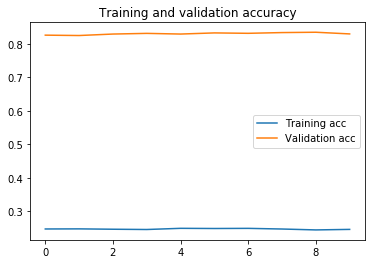

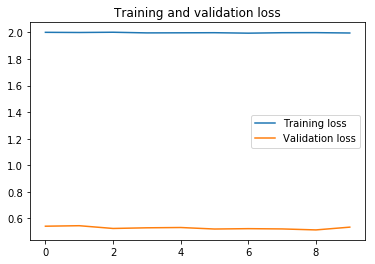

start 461
Epoch 1/10
97/97 [==============================] - 54s 556ms/step - loss: 1.9976 - acc: 0.2463 - val_loss: 0.5284 - val_acc: 0.8333
Epoch 2/10
97/97 [==============================] - 53s 547ms/step - loss: 1.9990 - acc: 0.2466 - val_loss: 0.5218 - val_acc: 0.8341
Epoch 3/10
97/97 [==============================] - 53s 549ms/step - loss: 2.0024 - acc: 0.2439 - val_loss: 0.5470 - val_acc: 0.8287
Epoch 4/10
97/97 [==============================] - 54s 552ms/step - loss: 1.9962 - acc: 0.2465 - val_loss: 0.5128 - val_acc: 0.8350
Epoch 5/10
97/97 [==============================] - 53s 549ms/step - loss: 1.9945 - acc: 0.2466 - val_loss: 0.5166 - val_acc: 0.8336
Epoch 6/10
97/97 [==============================] - 54s 552ms/step - loss: 1.9985 - acc: 0.2499 - val_loss: 0.5120 - val_acc: 0.8364
Epoch 7/10
97/97 [==============================] - 54s 554ms/step - loss: 1.9960 - acc: 0.2485 - val_loss: 0.5282 - val_acc: 0.8324
Epoch 8/10
97/97 [==============================] - 54s 556

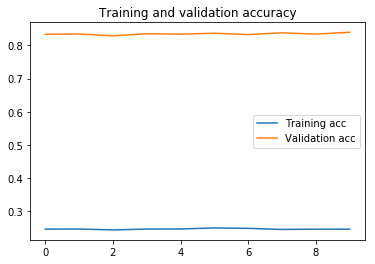

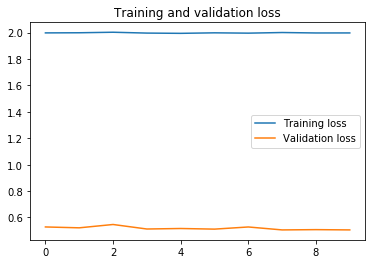

start 471
Epoch 1/10
97/97 [==============================] - 55s 570ms/step - loss: 1.9992 - acc: 0.2452 - val_loss: 0.5203 - val_acc: 0.8334
Epoch 2/10
97/97 [==============================] - 55s 563ms/step - loss: 2.0004 - acc: 0.2459 - val_loss: 0.5268 - val_acc: 0.8321
Epoch 3/10
97/97 [==============================] - 54s 561ms/step - loss: 1.9950 - acc: 0.2454 - val_loss: 0.5048 - val_acc: 0.8383
Epoch 4/10
97/97 [==============================] - 54s 559ms/step - loss: 2.0010 - acc: 0.2439 - val_loss: 0.5183 - val_acc: 0.8350
Epoch 5/10
97/97 [==============================] - 54s 560ms/step - loss: 2.0012 - acc: 0.2460 - val_loss: 0.5188 - val_acc: 0.8325
Epoch 6/10
97/97 [==============================] - 54s 559ms/step - loss: 1.9965 - acc: 0.2482 - val_loss: 0.5262 - val_acc: 0.8331
Epoch 7/10
97/97 [==============================] - 54s 555ms/step - loss: 1.9931 - acc: 0.2490 - val_loss: 0.5168 - val_acc: 0.8346
Epoch 8/10
97/97 [==============================] - 54s 560

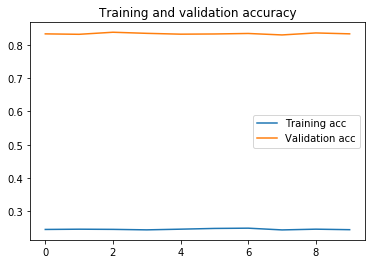

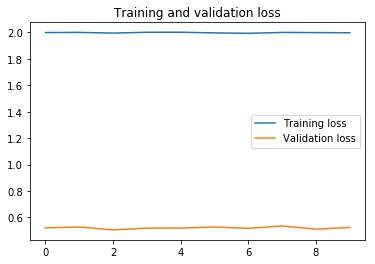

start 481
Epoch 1/10
97/97 [==============================] - 55s 571ms/step - loss: 1.9978 - acc: 0.2462 - val_loss: 0.5176 - val_acc: 0.8330
Epoch 2/10
97/97 [==============================] - 54s 560ms/step - loss: 1.9987 - acc: 0.2469 - val_loss: 0.5300 - val_acc: 0.8315
Epoch 3/10
97/97 [==============================] - 55s 563ms/step - loss: 1.9892 - acc: 0.2494 - val_loss: 0.5181 - val_acc: 0.8369
Epoch 4/10
97/97 [==============================] - 54s 559ms/step - loss: 1.9965 - acc: 0.2476 - val_loss: 0.5361 - val_acc: 0.8316
Epoch 5/10
97/97 [==============================] - 54s 561ms/step - loss: 1.9972 - acc: 0.2457 - val_loss: 0.5247 - val_acc: 0.8318
Epoch 6/10
97/97 [==============================] - 54s 558ms/step - loss: 1.9958 - acc: 0.2445 - val_loss: 0.5263 - val_acc: 0.8352
Epoch 7/10
97/97 [==============================] - 55s 562ms/step - loss: 1.9960 - acc: 0.2479 - val_loss: 0.5100 - val_acc: 0.8388
Epoch 8/10
97/97 [==============================] - 54s 561

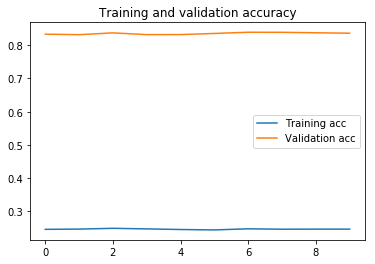

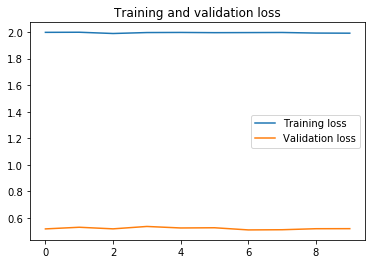

start 491
Epoch 1/10
97/97 [==============================] - 55s 572ms/step - loss: 2.0004 - acc: 0.2444 - val_loss: 0.5227 - val_acc: 0.8324
Epoch 2/10
97/97 [==============================] - 54s 562ms/step - loss: 1.9948 - acc: 0.2469 - val_loss: 0.5236 - val_acc: 0.8369
Epoch 3/10
97/97 [==============================] - 55s 562ms/step - loss: 1.9952 - acc: 0.2456 - val_loss: 0.5292 - val_acc: 0.8322
Epoch 4/10
97/97 [==============================] - 54s 562ms/step - loss: 1.9967 - acc: 0.2476 - val_loss: 0.5305 - val_acc: 0.8336
Epoch 5/10
97/97 [==============================] - 55s 562ms/step - loss: 1.9903 - acc: 0.2485 - val_loss: 0.5400 - val_acc: 0.8291
Epoch 6/10
97/97 [==============================] - 55s 564ms/step - loss: 1.9953 - acc: 0.2480 - val_loss: 0.5066 - val_acc: 0.8392
Epoch 7/10
97/97 [==============================] - 55s 562ms/step - loss: 1.9854 - acc: 0.2516 - val_loss: 0.5250 - val_acc: 0.8338
Epoch 8/10
97/97 [==============================] - 54s 562

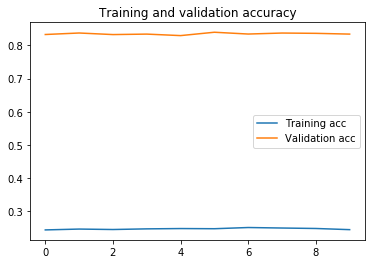

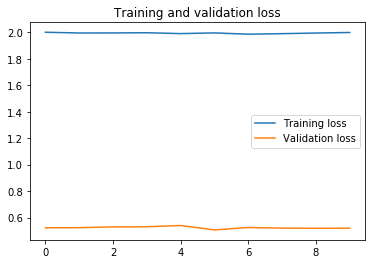

start 501
Epoch 1/10
97/97 [==============================] - 56s 572ms/step - loss: 1.9862 - acc: 0.2503 - val_loss: 0.5326 - val_acc: 0.8315
Epoch 2/10
97/97 [==============================] - 54s 561ms/step - loss: 1.9936 - acc: 0.2482 - val_loss: 0.5049 - val_acc: 0.8395
Epoch 3/10
97/97 [==============================] - 55s 563ms/step - loss: 1.9951 - acc: 0.2456 - val_loss: 0.5165 - val_acc: 0.8350
Epoch 4/10
97/97 [==============================] - 55s 563ms/step - loss: 1.9918 - acc: 0.2480 - val_loss: 0.5149 - val_acc: 0.8350
Epoch 5/10
97/97 [==============================] - 54s 559ms/step - loss: 1.9993 - acc: 0.2460 - val_loss: 0.5163 - val_acc: 0.8343
Epoch 6/10
97/97 [==============================] - 55s 562ms/step - loss: 1.9886 - acc: 0.2497 - val_loss: 0.5377 - val_acc: 0.8303
Epoch 7/10
97/97 [==============================] - 55s 562ms/step - loss: 1.9901 - acc: 0.2505 - val_loss: 0.5368 - val_acc: 0.8296
Epoch 8/10
97/97 [==============================] - 55s 564

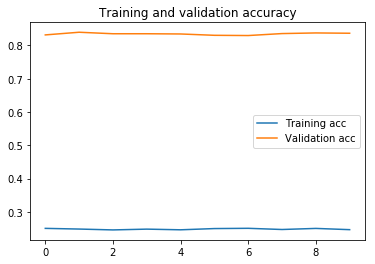

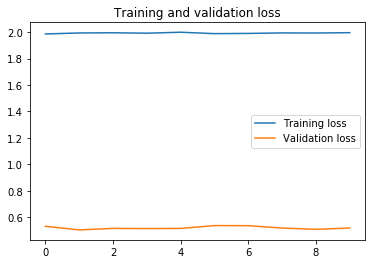

start 511
Epoch 1/10
97/97 [==============================] - 56s 575ms/step - loss: 1.9938 - acc: 0.2503 - val_loss: 0.5151 - val_acc: 0.8380
Epoch 2/10
97/97 [==============================] - 55s 564ms/step - loss: 1.9925 - acc: 0.2486 - val_loss: 0.5377 - val_acc: 0.8311
Epoch 3/10
97/97 [==============================] - 61s 632ms/step - loss: 1.9921 - acc: 0.2483 - val_loss: 0.5139 - val_acc: 0.8388
Epoch 4/10
97/97 [==============================] - 57s 586ms/step - loss: 1.9906 - acc: 0.2484 - val_loss: 0.5008 - val_acc: 0.8416
Epoch 5/10
97/97 [==============================] - 55s 564ms/step - loss: 1.9963 - acc: 0.2463 - val_loss: 0.5338 - val_acc: 0.8347
Epoch 6/10
97/97 [==============================] - 61s 632ms/step - loss: 1.9989 - acc: 0.2479 - val_loss: 0.5401 - val_acc: 0.8311
Epoch 7/10
97/97 [==============================] - 57s 585ms/step - loss: 1.9938 - acc: 0.2476 - val_loss: 0.5175 - val_acc: 0.8362
Epoch 8/10
97/97 [==============================] - 55s 567

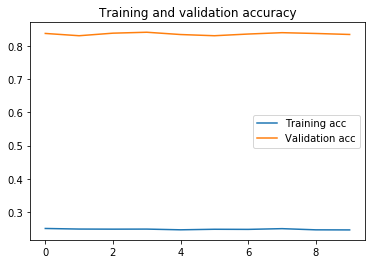

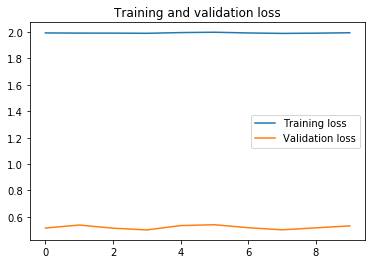

start 521
Epoch 1/10
97/97 [==============================] - 56s 579ms/step - loss: 1.9983 - acc: 0.2452 - val_loss: 0.5126 - val_acc: 0.8380
Epoch 2/10
97/97 [==============================] - 55s 568ms/step - loss: 1.9930 - acc: 0.2467 - val_loss: 0.5056 - val_acc: 0.8408
Epoch 3/10
97/97 [==============================] - 55s 568ms/step - loss: 1.9887 - acc: 0.2507 - val_loss: 0.5225 - val_acc: 0.8334
Epoch 4/10
97/97 [==============================] - 55s 567ms/step - loss: 1.9936 - acc: 0.2470 - val_loss: 0.5305 - val_acc: 0.8329
Epoch 5/10
97/97 [==============================] - 55s 568ms/step - loss: 1.9959 - acc: 0.2472 - val_loss: 0.5164 - val_acc: 0.8351
Epoch 6/10
97/97 [==============================] - 56s 577ms/step - loss: 1.9915 - acc: 0.2479 - val_loss: 0.5467 - val_acc: 0.8316
Epoch 7/10
97/97 [==============================] - 56s 579ms/step - loss: 2.0004 - acc: 0.2451 - val_loss: 0.5266 - val_acc: 0.8345
Epoch 8/10
97/97 [==============================] - 55s 569

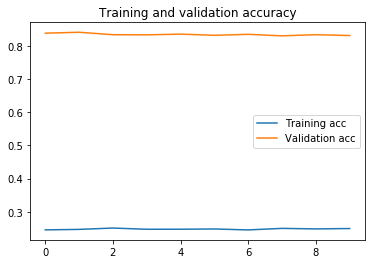

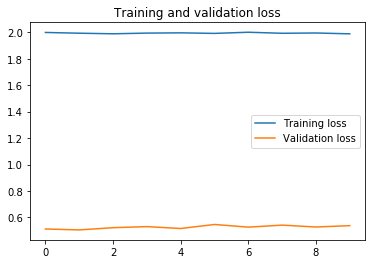

start 531
Epoch 1/10
97/97 [==============================] - 56s 577ms/step - loss: 1.9948 - acc: 0.2488 - val_loss: 0.5054 - val_acc: 0.8412
Epoch 2/10
97/97 [==============================] - 55s 563ms/step - loss: 1.9820 - acc: 0.2524 - val_loss: 0.5297 - val_acc: 0.8356
Epoch 3/10
97/97 [==============================] - 55s 565ms/step - loss: 1.9878 - acc: 0.2513 - val_loss: 0.5157 - val_acc: 0.8410
Epoch 4/10
97/97 [==============================] - 55s 564ms/step - loss: 1.9859 - acc: 0.2521 - val_loss: 0.5204 - val_acc: 0.8346
Epoch 5/10
97/97 [==============================] - 55s 565ms/step - loss: 1.9907 - acc: 0.2491 - val_loss: 0.5195 - val_acc: 0.8352
Epoch 6/10
97/97 [==============================] - 55s 565ms/step - loss: 1.9984 - acc: 0.2471 - val_loss: 0.5120 - val_acc: 0.8397
Epoch 7/10
97/97 [==============================] - 55s 564ms/step - loss: 1.9903 - acc: 0.2484 - val_loss: 0.5128 - val_acc: 0.8413
Epoch 8/10
97/97 [==============================] - 55s 564

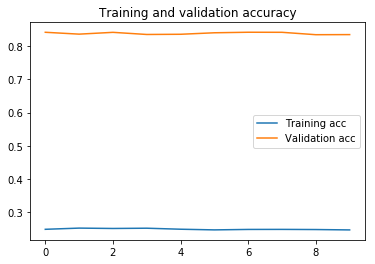

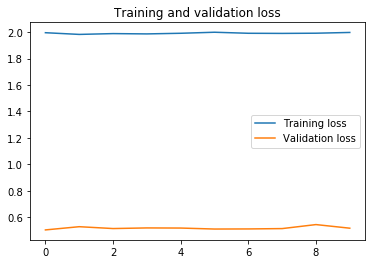

start 541
Epoch 1/10
97/97 [==============================] - 56s 576ms/step - loss: 1.9906 - acc: 0.2469 - val_loss: 0.5217 - val_acc: 0.8402
Epoch 2/10
97/97 [==============================] - 55s 567ms/step - loss: 1.9921 - acc: 0.2483 - val_loss: 0.5173 - val_acc: 0.8375
Epoch 3/10
97/97 [==============================] - 55s 566ms/step - loss: 1.9892 - acc: 0.2511 - val_loss: 0.5131 - val_acc: 0.8396
Epoch 4/10
97/97 [==============================] - 55s 567ms/step - loss: 1.9927 - acc: 0.2474 - val_loss: 0.5218 - val_acc: 0.8377
Epoch 5/10
97/97 [==============================] - 55s 566ms/step - loss: 1.9935 - acc: 0.2457 - val_loss: 0.5208 - val_acc: 0.8353
Epoch 6/10
97/97 [==============================] - 55s 566ms/step - loss: 1.9907 - acc: 0.2470 - val_loss: 0.5183 - val_acc: 0.8364
Epoch 7/10
97/97 [==============================] - 55s 567ms/step - loss: 1.9955 - acc: 0.2466 - val_loss: 0.5325 - val_acc: 0.8350
Epoch 8/10
97/97 [==============================] - 55s 568

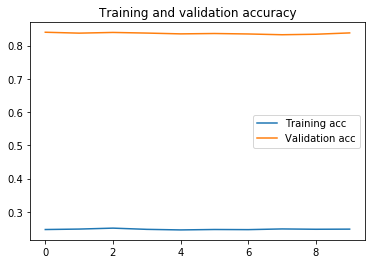

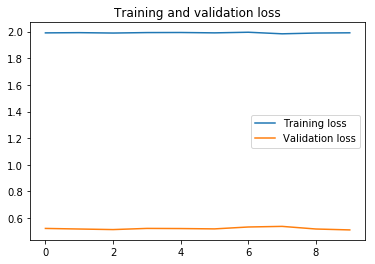

start 551
Epoch 1/10
97/97 [==============================] - 56s 575ms/step - loss: 1.9943 - acc: 0.2481 - val_loss: 0.5127 - val_acc: 0.8386
Epoch 2/10
97/97 [==============================] - 55s 563ms/step - loss: 1.9883 - acc: 0.2500 - val_loss: 0.5425 - val_acc: 0.8290
Epoch 3/10
97/97 [==============================] - 55s 564ms/step - loss: 1.9912 - acc: 0.2468 - val_loss: 0.5186 - val_acc: 0.8349
Epoch 4/10
97/97 [==============================] - 55s 565ms/step - loss: 1.9897 - acc: 0.2496 - val_loss: 0.5212 - val_acc: 0.8380
Epoch 5/10
97/97 [==============================] - 55s 565ms/step - loss: 1.9962 - acc: 0.2463 - val_loss: 0.5165 - val_acc: 0.8366
Epoch 6/10
97/97 [==============================] - 55s 565ms/step - loss: 1.9947 - acc: 0.2482 - val_loss: 0.5455 - val_acc: 0.8285
Epoch 7/10
97/97 [==============================] - 55s 568ms/step - loss: 1.9833 - acc: 0.2531 - val_loss: 0.5284 - val_acc: 0.8344
Epoch 8/10
97/97 [==============================] - 55s 566

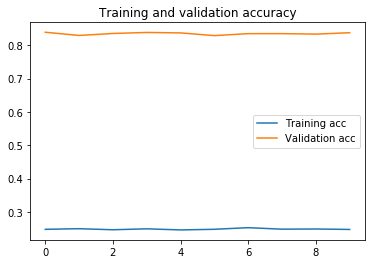

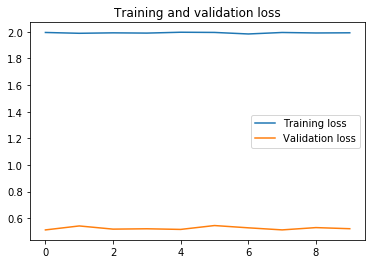

In [0]:


train_datagen1 = ImageDataGenerator(rotation_range=10,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   channel_shift_range=5,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_datagen2 = ImageDataGenerator(rotation_range=20,
                                   width_shift_range=0.15,
                                   height_shift_range=0.15,
                                   shear_range=0.15,
                                   zoom_range=0.15,
                                   channel_shift_range=5,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
train_datagen3 = ImageDataGenerator(rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   channel_shift_range=10,
                                   horizontal_flip=True,
                                   fill_mode='nearest')


train_datagen1.fit(x_train)
train_datagen2.fit(x_train)
train_datagen3.fit(x_train)



 
  
train_cycle = 20
epoch_num = 10
h5 = root+'ColabOK/'+'model-resnet50-final-AR3351.h5'

net_final.load_weights(h5)

for i in range(train_cycle):
  print(f'start {1+(36+i)*10}')
  fname = 'model-resnet50-final-AR3'+str(1+(36+i)*10)+'.h5'
  WEIGHTS_FINAL = root+'ColabOK/'+fname
  history_AR3= net_final.fit_generator(train_datagen1.flow(x_train, y_train, batch_size=512),
                    steps_per_epoch=int(len(x_train)//512),
                    validation_data=(x_test, y_test),
                    epochs=epoch_num, verbose=1)
    
  net_final.save(WEIGHTS_FINAL)
  call_history(history_AR3)

In [0]:
#pre_check after 140 times we have a not bad 0.7632 accuracy ~~
#net_final.evaluate(x_test,y_test)

10000/10000 [==============================] - 11s 1ms/sample - loss: 0.6902 - acc: 0.7632


[0.690219005393982, 0.7632]

In [0]:
h5 = root+'ColabOK/'+'model-resnet50-final-AR3351.h5'
net_final.load_weights(h5)
net_final.evaluate(x_test,y_test)

#360 times

10000/10000 [==============================] - 10s 999us/sample - loss: 0.5456 - acc: 0.8212


[0.5456287228345871, 0.8212]

In [0]:
h5 = root+'ColabOK/'+'model-resnet50-final-AR3531.h5'
net_final.load_weights(h5)
net_final.evaluate(x_test,y_test)

10000/10000 [==============================] - 10s 999us/sample - loss: 0.5196 - acc: 0.8342


[0.5195756286382676, 0.8342]

In [0]:
h5 = root+'ColabOK/'+'model-resnet50-final-AR3551.h5'
net_final.load_weights(h5)
net_final.evaluate(x_test,y_test)


10000/10000 [==============================] - 10s 1ms/sample - loss: 0.5215 - acc: 0.8372


[0.5215053698539734, 0.8372]